# Linear Regression and Regularization from Scratch


## Table of Contents

- [1. Introduction](#1-Introduction)
- [2. Linear Model](#2-linear-model)
- [3. Loss Function (MSE)](#3-loss-function-mse)
- [4. Normal Equation Method](#4-normal-equation-method)
- [5. Gradient Descent](#5-gradient-descent)
- [6. Stochastic Gradient Descent (SGD)](#6-stochastic-gradient-descent-sgd)
- [7. Regularization](#7-Regularization)
- [8. Implementation of Linear Regression Model](#8-Implementation-of-Linear-Regression-Model)
- [9. Visualization of Convergence Trajectories for Stochastic and Classical Gradient Descent](#9-visualization-of-convergence-trajectories-for-stochastic-and-classical-gradient-descent)
- [10. Loss Function Comparison of SGD and GD](#10-loss-function-comparison-of-sgd-and-gd)
- [11. Comparison of Custom and Sklearn Models](#11-comparison-of-custom-and-sklearn-models)



#### 1. Introduction
 > This document provides a practical exploration of regularized linear models, focusing on building a model from scratch to enhance understanding of core concepts. It covers the linear model, loss functions, and two key approaches to finding parameters: the analytical solution via the Normal Equation and the iterative optimization via Gradient Descent and Stochastic Gradient Descent (SGD). Additionally, the document includes an examination of convergence behaviors, testing convergence rates, implementing regularization techniques, and comparing custom implementations with scikit-learn's built-in models.

#### **2. Linear Model**

Linear regression is described by the equation:

$$
\hat{y} = X \theta
$$

Where:
- $ X $ — feature matrix ($ m \times n $).
- $ \theta $ — parameter vector.
- $ \hat{y} $ — predicted values.

#### **3. Loss Function (MSE)**

Mean Squared Error (MSE) loss function:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (\hat{y}_i - y_i)^2
$$

#### **4. Normal Equation Method**

Solution using the normal equation:

$$
\theta = (X^T X)^{-1} X^T y
$$

#### **5. Gradient Descent**

Gradient descent update rule:

$$
\theta = \theta - \alpha \frac{1}{m} X^T (X \theta - y)
$$

#### **6. Stochastic Gradient Descent (SGD)**

Mini-batch update rule for SGD:

$$
\theta = \theta - \alpha \left( \frac{1}{\text{batch\_size}} X_{\text{batch}}^T (X_{\text{batch}} \theta - y_{\text{batch}}) \right)
$$

#### **7. Regularization**

Regularization adds a penalty to large parameter values to prevent overfitting.

##### L2 Regularization (Ridge)

Loss function with L2 regularization:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (\hat{y}_i - y_i)^2 + \frac{\lambda}{2m} \|\theta\|^2
$$

##### L1 Regularization (Lasso)

Loss function with L1 regularization:

$$
J(\theta) =  \frac{1}{2m} \sum_{i=1}^{m} (\hat{y}_i - y_i)^2  + \frac{\lambda}{2m} \|\theta\|_1
$$

##### Changes in Methods:

1. **Normal Equation with L2 Regularization**:
   $$
   \theta = (X^T X + \lambda I)^{-1} X^T y
   $$

2. **Gradient Descen**t:
   - With L2 Regularization:
   $$
   \theta = \theta - \alpha \left( \frac{1}{m} X^T (X \theta - y) + \frac{\lambda}{m} \theta \right)
   $$
   - With L1 Regularization:
   $$
   \theta = \theta - \alpha \left( \frac{1}{m} X^T (X \theta - y) + \frac{\lambda}{m} \text{sign}(\theta) \right)
   $$


#### **8. Implementation of Linear Regression Model**

In [96]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegression:
    """
    Linear Regression:
    - 'normal': exact solution by normal equation
    - 'gradient_descent'
    """

    def __init__(self, method='normal', alpha=0.01, n_iter=1000, batch_size=None, dynamic_step=False, s0=1, p=0.5,  regularization=None, lambda_=0.01):
        """
        :param method: Learning method (normal or GD)
        :param alpha: Learning rate (GD, SGD)
        :param n_iter: Number of iterations (GD, SGD)
        :param batch_size: Batch size (if None, classic GD used)
        :param dynamic_step: dynamic step size
        :param regularization: Type regularization ('l1', 'l2', None)
        :param lambda_: Regularization coef
        """
        self.method = method
        self.alpha = alpha
        self.n_iter = n_iter
        self.batch_size = batch_size
        self.theta = None
        self.dynamic_step = dynamic_step  # Flag for using dynamic step
        self.s0 = s0  # Parameter for dynamic step
        self.p = p  # Parameter for dynamic ste
        self.regularization = regularization  # Type of regularization ('l1', 'l2', or None)
        self.lambda_ = lambda_  # regularization coef
        self.w_history = []  #  weight history for visualization
        self.loss_history = [] # loss history for visualization

    def fit(self, X: np.ndarray, y: np.ndarray):
        """
        Fit the linear regression model to the data X and y.
        :param X: np.ndarray, feature matrix (n_samples, n_features)
        :param y: np.ndarray, target vector (n_samples,)
        """
        X = np.hstack([X, np.ones((X.shape[0], 1))])

        if self.method == 'normal':
            self._normal_equation(X, y)
        elif self.method == 'gradient_descent':
            self._gradient_descent(X, y)

    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Predict values for new data.
        :param X: np.ndarray, feature matrix (n_samples, n_features)
        :return: np.ndarray, predicted values (n_samples,)
        """
        X = np.hstack([X, np.ones((X.shape[0], 1))])

        return X.dot(self.theta)

    def _normal_equation(self, X: np.ndarray, y: np.ndarray):
        self.theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

    def _gradient_descent(self, X: np.ndarray, y: np.ndarray):
        self.theta = np.zeros(X.shape[1])
        m = len(y)
        self.loss_history = [] 
        
        batch_size = self.batch_size if self.batch_size else m

        for t in range(self.n_iter):
            # Calculate dynamic learning rate 
            if self.dynamic_step:
                eta = self.alpha * (self.s0 / (self.s0 + t)) ** self.p  # Dynamic step size 
            else:
                eta = self.alpha  # Fixed learning rate

        
            batch_indices = np.random.choice(m, size=batch_size, replace=False)
            X_batch, y_batch = X[batch_indices], y[batch_indices]

            y_pred = X_batch.dot(self.theta)
            gradient = (1 / batch_size) * X_batch.T.dot(y_pred - y_batch)


             # Apply regularization
            if self.regularization == 'l2':
                gradient[:-1] += self.lambda_ * self.theta[:-1]
            elif self.regularization == 'l1':
                gradient[:-1] += self.lambda_ * np.sign(self.theta[:-1])

            # Update weights
            self.theta -= eta * gradient
            self.w_history.append(self.theta.copy())  #  weights for each iteration
            loss = np.mean((X.dot(self.theta) - y) ** 2)
             # Apply regularization
            if self.regularization == 'l2':
                loss += self.lambda_ * np.sum(self.theta[:-1] ** 2) / 2
            elif self.regularization == 'l1':
                loss += self.lambda_ * np.sum(np.abs(self.theta[:-1]))

            self.loss_history.append(loss)


#### **9. Visualization of Convergence Trajectories for Stochastic and Classical Gradient Descent**

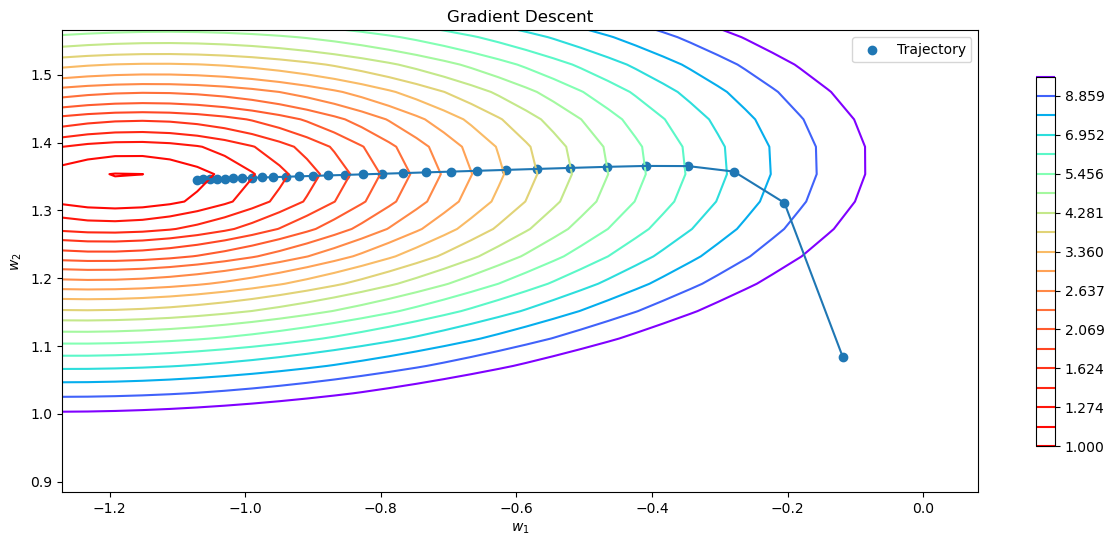

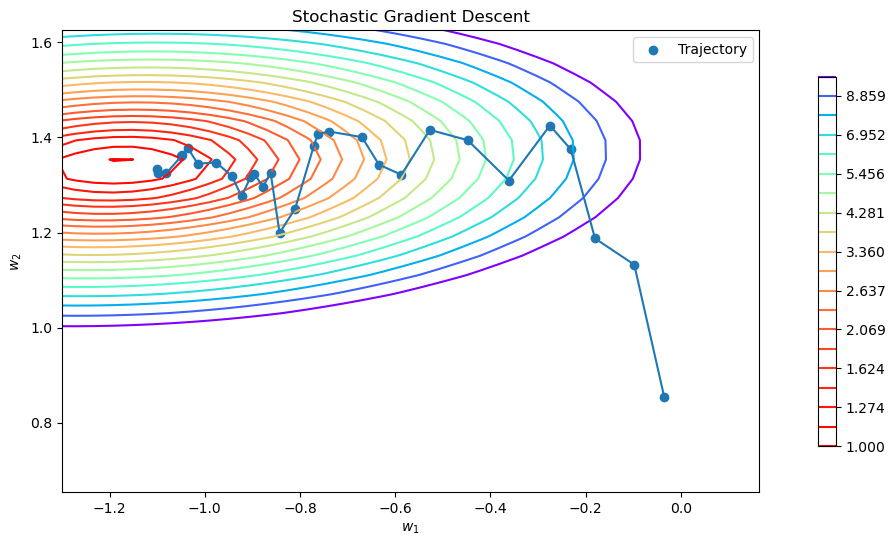

In [58]:

def plot_gradient(w_list, X, Y, w_true, title):
    A, B = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - Y, 2))

    plt.figure(figsize=(15, 6))
    plt.title(title)
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim((w_list[:, 0].min() - 0.2, w_list[:, 0].max() + 0.2))
    plt.ylim((w_list[:, 1].min() - 0.2, w_list[:, 1].max() + 0.2))
    plt.gca().set_aspect("equal")

    # Visualize the level set
    CS = plt.contour(A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r)
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # Visualize the trajectory
    #plt.scatter(w_true[0], w_true[1], c="r", label="True Weights")
    plt.scatter(w_list[:, 0], w_list[:, 1], label="Trajectory")
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.legend()
    plt.show()


# Generation dataset
n_features = 2
n_objects = 300

np.random.seed(404)

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
Y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_0 = np.random.uniform(-3, 3, (n_features))



##
# SGD
batch_size = 10
num_steps = 30
model_sgd = LinearRegression(method='gradient_descent', alpha=0.01, n_iter=num_steps, batch_size=batch_size)
model_sgd.fit(X, Y)
w_list_sgd = np.array(model_sgd.w_history) 
##
# GD
model_gd = LinearRegression(method='gradient_descent', alpha=0.01, n_iter=num_steps, batch_size=None)  # Full batch
model_gd.fit(X, Y)
w_list_gd = np.array(model_gd.w_history) 

## Plot


plot_gradient(w_list_gd, X, Y, w_true, "Gradient Descent")
plot_gradient(w_list_sgd, X, Y, w_true, "Stochastic Gradient Descent")


##### **Learning Rate Decay Formula:**

$$
\eta_t = \lambda \left( \frac{s_0}{s_0 + t} \right)^p
$$

where:
- $ \eta_t $ is the learning rate at iteration $ t $,
- $ \lambda $ is the initial learning rate (represented by the `alpha` parameter in the code),
- $ s_0 $ is a parameter that controls the initial rate of decay,
- $ p $ is a parameter that controls how quickly the learning rate decreases,
- $ t $ is the current iteration number.


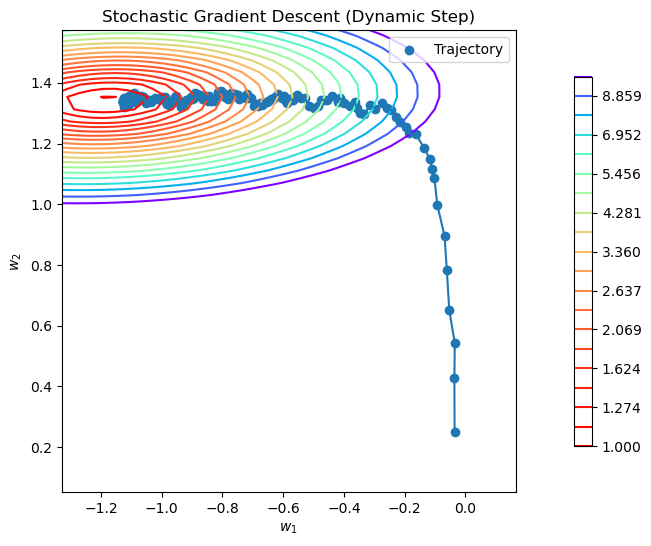

In [59]:
model_sgd = LinearRegression(method='gradient_descent', alpha=0.01, n_iter= 200, batch_size=10, dynamic_step= True, s0=1, p=.3)
model_sgd.fit(X, Y)
w_list_sgd = np.array(model_sgd.w_history)

plot_gradient(w_list_sgd, X, Y, w_true, "Stochastic Gradient Descent (Dynamic Step)")

#### **10. Loss Function Comparison of SGD and GD**

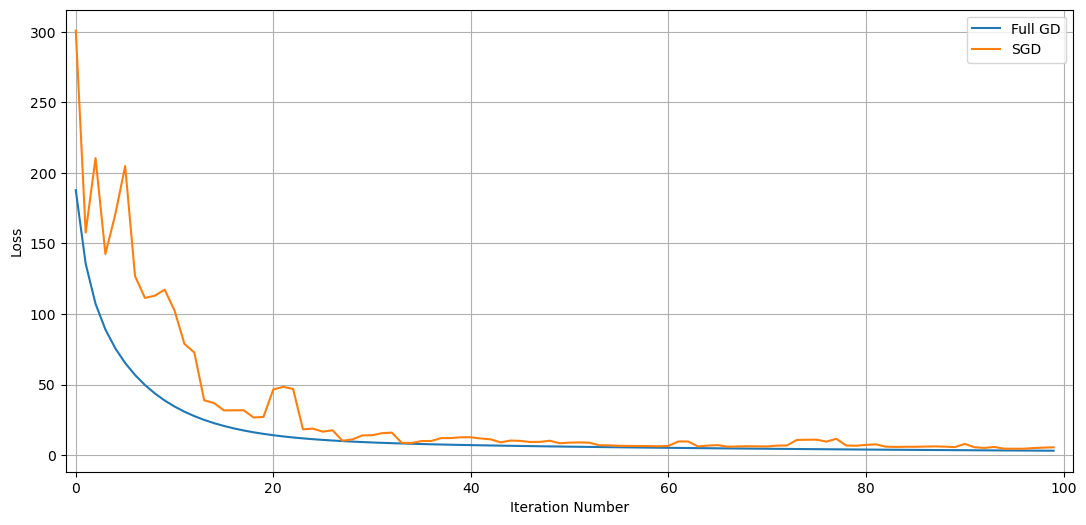

In [112]:
batch_size = 1
num_steps = 100
n_features = 4
n_objects = 3000

np.random.seed(404)

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
Y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_0 = np.random.uniform(-3, 3, (n_features))


# SGD
model_sgd = LinearRegression(method='gradient_descent', alpha=0.0007, n_iter=num_steps, batch_size=batch_size,dynamic_step=False)
model_sgd.fit(X, Y)
residuals_sgd = model_sgd.loss_history  

# GD
model_gd = LinearRegression(method='gradient_descent', alpha=0.001, n_iter=num_steps, batch_size=None, dynamic_step=False)
model_gd.fit(X, Y)
residuals_gd = model_gd.loss_history  

plt.figure(figsize=(13, 6))
plt.plot(range(num_steps), residuals_gd, label="Full GD") 
plt.plot(range(num_steps), residuals_sgd, label="SGD") 
plt.xlim([-1, num_steps + 1])
plt.legend()
plt.xlabel("Iteration Number")
plt.ylabel("Loss") 
plt.grid(True)
plt.show()

#### **11. Comparison of Custom and Sklearn Models**

In [108]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression as SklearnLinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Data generation
np.random.seed(42)
X, y = np.random.randn(100, 5), np.random.randn(5).dot(np.random.randn(100, 5).T) + np.random.normal(0, 0.5, 100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model config
models = [
    ("Custom Normal Equation", LinearRegression(method='normal')),
    ("Sklearn Linear Regression", SklearnLinearRegression()),
    ("Custom Gradient Descent", LinearRegression(method='gradient_descent', alpha=0.01, n_iter=500)),
    ("Custom GD (L2)", LinearRegression(method='gradient_descent', alpha=0.01, n_iter=500, regularization='l2', lambda_=0.1)),
    ("Custom GD (L1)", LinearRegression(method='gradient_descent', alpha=0.01, n_iter=500, regularization='l1', lambda_=0.1)),
    ("Sklearn Ridge (L2)", Ridge(alpha=0.1)),
    ("Sklearn Lasso (L1)", Lasso(alpha=0.1))
]

# Evaluation
results = []
for name, model in models:
    model.fit(X_train, y_train)
    mse = mean_squared_error(y_test, model.predict(X_test))
    results.append({"Model": name, "MSE": f"{mse:.3f}"})


print(pd.DataFrame(results))


                       Model    MSE
0     Custom Normal Equation  5.343
1  Sklearn Linear Regression  5.343
2    Custom Gradient Descent  5.343
3             Custom GD (L2)  5.314
4             Custom GD (L1)  5.275
5         Sklearn Ridge (L2)  5.342
6         Sklearn Lasso (L1)  5.275
